<a href="https://colab.research.google.com/github/HarshalPawar88/Evaluation-Projects/blob/main/Loan_Application_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Poject title: "Loan Status Prediction Model"

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 


### <font color="blue">Import some important libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import seaborn as sns
import re
plt.rcParams['figure.figsize']=12,8
sns.set(rc={'figure.figsize':(12,8)})


<font color='blue'>**Importing Loan Status data set**

In [3]:
data_loan=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<font color='blue'>**Creating copy of original data**

In [4]:
data=data_loan.copy()

<font color='blue'>**Exploaring  data analysis**

    
    
<font color='black'>
    
    1.Getting to know the data
    
    2.Data preprocessing(Missing values)
    
    3.Cross table and data visualization

<font color='blue'>**To check variables data type**

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


<font color='blue'>**Check for missing values**

In [6]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


<font color='blue'>**Summary of numerical variables**

In [7]:
summary_num=data.describe()
print(summary_num)

       ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  ...         600.00000      564.000000
mean       5403.459283        1621.245798  ...         342.00000        0.842199
std        6109.041673        2926.248369  ...          65.12041        0.364878
min         150.000000           0.000000  ...          12.00000        0.000000
25%        2877.500000           0.000000  ...         360.00000        1.000000
50%        3812.500000        1188.500000  ...         360.00000        1.000000
75%        5795.000000        2297.250000  ...         360.00000        1.000000
max       81000.000000       41667.000000  ...         480.00000        1.000000

[8 rows x 5 columns]


<font color='blue'>**Summary of categorical variables**

In [8]:
summary_cate=data.describe(include="O")  # "O" for object variable type
print(summary_cate)

         Loan_ID Gender Married  ... Self_Employed Property_Area Loan_Status
count        614    601     611  ...           582           614         614
unique       614      2       2  ...             2             3           2
top     LP002319   Male     Yes  ...            No     Semiurban           Y
freq           1    489     398  ...           500           233         422

[4 rows x 8 columns]


<font color='blue'>**Frequency of each categories**

In [9]:
data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [15]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

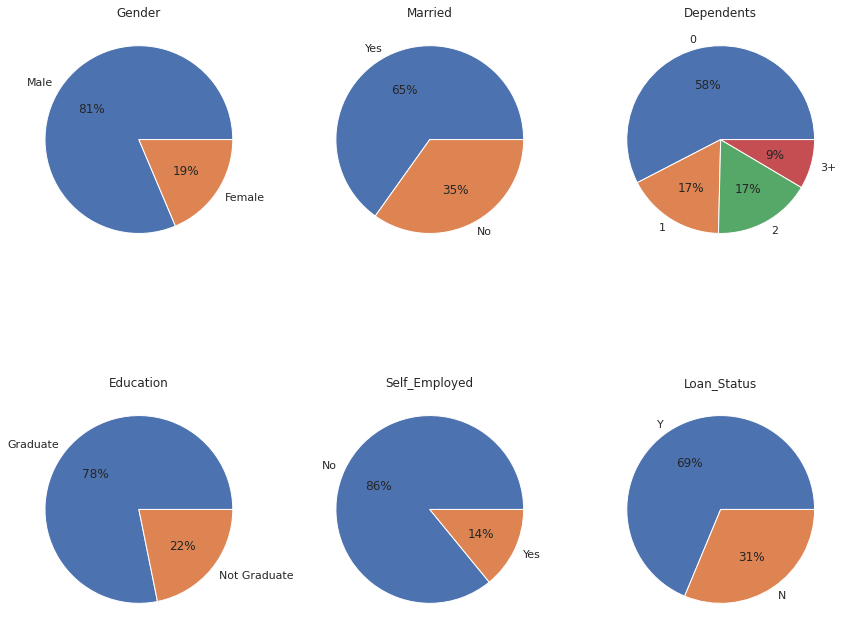

In [16]:
# Overall Categorical data distribution
plt.figure(figsize=(12,16))
categorical_features=["Gender","Married","Dependents","Education","Self_Employed","Loan_Status"]
for index, col in enumerate(categorical_features, start=1):
    plt.subplot(3,3,index)
    plt.title(col)
    plt.pie(data[col].value_counts().values, autopct='%1.0f%%',labels=data[col].value_counts().index)
plt.tight_layout()

<font color="purple">Larger population appearing for loans are Male,Married, Graduate, Not Self-employed, Married and with 0 dependents.
    
 Self-Employed: Most people are not self-employed i.e., they have jobs
    
 Credit History: Most people have creedit history 1
    
 Loan Status: Most people get loans.

<font color='blue'>**Check for unique classes**

In [17]:
print(data["Gender"].unique())
print(data["Married"].unique())
print(data["Dependents"].unique())
print(data["Education"].unique())
print(data["Self_Employed"].unique())
print(data["Property_Area"].unique())
print(data["Loan_Status"].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


<font color="purple">There exists 'nan' value in the Gender , Married ,Dependence, Self_employed columns

 ### <font color='blue'> * Data pre-processing

**Identify the missing data**

In [18]:
print("Data columns with null values:\n",data.isnull().sum())

Data columns with null values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



    
    We found out that 13 cells are missing under Gender, 
    3 cells missing under Married, 
    15 cells missing under Dependents ,
    32 cells missing under self employed ,
    22 cells missing under Loan amount, 
    14 cells missing under loan amount term 
    and 50 cells are missing under Credit History
    Other variables do not have any missing values.

<font color='purple'>**Let us see in a particular row either one of the column is missing or both the column values are missing.
For that let us subset the rows at least one column is missing in a row**

In [19]:
missing=data[data.isnull().any(axis=1)] 
# axis=1 we subset the rows by giving dot any axis is equal to 1
#so it considered at least one missing colums in a particular row
missing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


<font color='purple'> **In this case, we have to model the mechanisms that produce missing values or the relationship of interest which is very complex in these case. So here we are going to remove all the rows with missing values.**

In [21]:
data2=data.dropna(axis=0)  # axis =0 means remove row if contain nan values

In [22]:
print("Data columns with null values:\n",data2.isnull().sum())

Data columns with null values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### <font color='blue'> Relationship between independent variables

In [23]:
correlation=data2.corr()
print(correlation)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.010838       -0.056152  
CoapplicantIncome         -0.005775       -0.008692  
LoanAmount                 0.050867       -0.040773  
Loan_Amount_Term           1.000000        0.032937  
Credit_History             0.032937        1.000000  


<font color='purple'>We can say that there is a strong relationship between two variable if it closer to 1. If correlation value closer to 0 then there is no relationship exists.

<font color='purple'>There is moderate relationship between Loan Amount and Applicant Income.

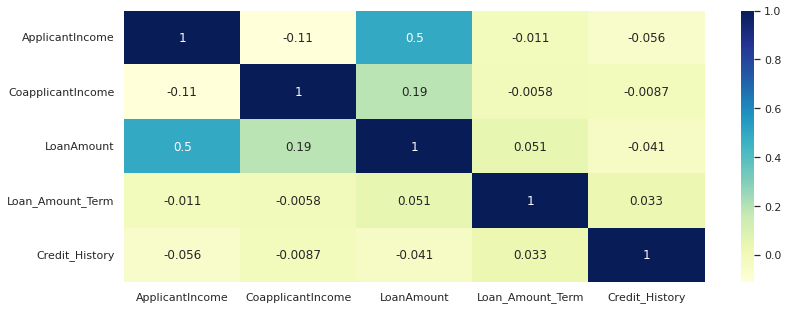

In [24]:
sns.set(rc={'figure.figsize':(13,5)})
sns.heatmap(data2.corr(),annot=True,cmap='YlGnBu')

<font color='purple'>From the above heatmap, we can see that there is a moderate correlation only in between 
Applicant Income and the Loan Amount

<font color='blue'>**Cross table and data visualization**

<font color='blue'>Gender Proportion table

In [25]:
gender= pd.crosstab(index=data2["Gender"],columns="proportion",normalize=True);gender
# Normalize=True , by dividing all values by the sum of values

col_0,proportion
Gender,
Female,0.179167
Male,0.820833


<font color='blue'>Credit History proportion table

In [26]:
Credit_History= pd.crosstab(index=data2["Credit_History"],columns="proportion",normalize=True);Credit_History


col_0,proportion
Credit_History,
0.0,0.145833
1.0,0.854167


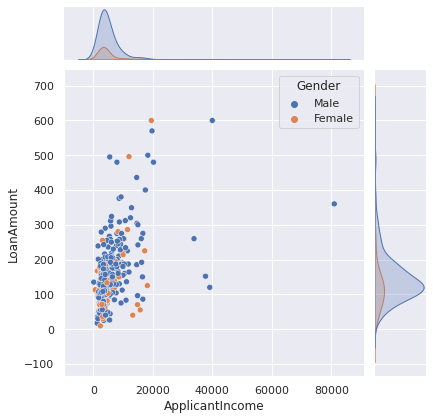

In [27]:
sns.set(rc={'figure.figsize':(13,5)})
sns.jointplot(x='ApplicantIncome',y='LoanAmount',data=data2,hue=data2["Gender"])

<font color="purple">From the above graph we can see that most of the applicant income are around 0-20000 and the loan amount is 0-350
also there are more male applicants than female applicants

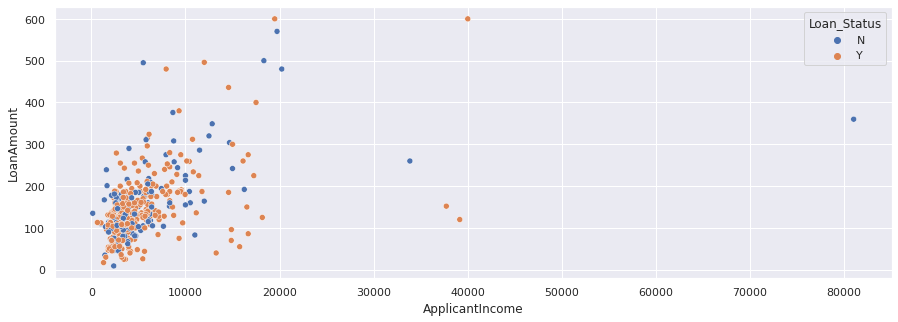

In [28]:
#loan-amount by the person with its own income amount, with laon status
sns.set(rc={'figure.figsize':(15,5)})
sns.scatterplot(x="ApplicantIncome", y="LoanAmount",hue='Loan_Status',data=data2)

<font color="purple"> Seems like Loan Amount and Applicant Income have a slight linear relationship.

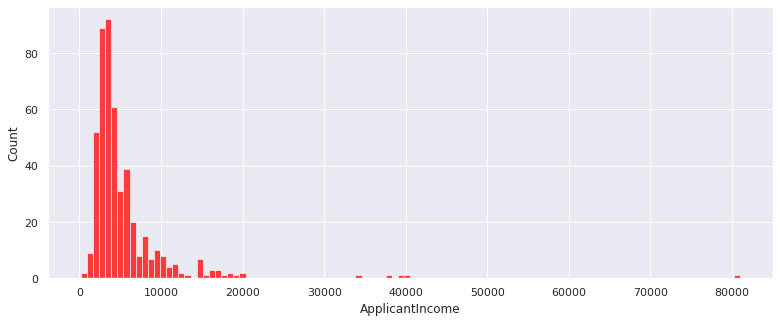

In [29]:
#plt.figure(figsize=(10,7))
sns.set(rc={'figure.figsize':(13,5)})
sns.histplot(x='ApplicantIncome',data=data2,color='Red')

<font color="purple">The distribution plots indicate that majority of those people have submitted an application for loan who have income between 0 & 10000($).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


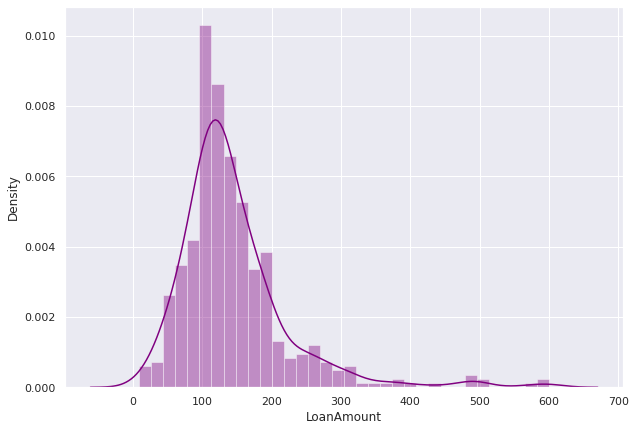

In [30]:
plt.figure(figsize=(10,7))
sns.distplot(data2['LoanAmount'],color='purple')

<font color="purple">"The following distribution plots show that majority of people wanted a loan between 100,000 & 200,000($).

## <font color="blue"> We want to check wheather Credit_Hostory and Loan_status are related or not .

### Statistical test: Chi square test for independence

The Chi-square test of independence is a statistical hypothesis test used to determine whether two categorical or nominal variables are likely to be related or not.

**We want to test the following null and alternative hypothesis**,

Ho: There is no relationship between credit history and loan status

Vs

H1: There is relationship between credit history and loan status

In [31]:
from scipy import stats
ct = pd.crosstab(data2.Credit_History, data2.Loan_Status, margins=True) #ct :Contigency table
ct

Loan_Status,N,Y,All
Credit_History,,,
0.0,63,7,70
1.0,85,325,410
All,148,332,480


In [32]:
obs = np.array([ct.iloc[0][0:2].values,ct.iloc[1][0:2].values])
chisq_test=stats.chi2_contingency(obs)[0:3]
print("The chisquare test statistic= ",chisq_test[0], "\nDegree of Frredom (df)= ",chisq_test[2],"\nP-value= ",chisq_test[1])
if chisq_test[1] <=0.05:
    print("Decision:Reject null hypothesis,we can conclude that there is significant evidence to say that there is relationship between credit history and loan status")
else:
    print("Decision:Do not reject null hypothesis,We can conclude that there is significant evidence to say that there is relationship between credit history and loan status")

The chisquare test statistic=  131.29328312402075 
Degree of Frredom (df)=  1 
P-value=  2.135981766869101e-30
Decision:Reject null hypothesis,we can conclude that there is significant evidence to say that there is relationship between credit history and loan status


## <font color="blue"> We want to check wheather education and loan_status are related or not .

### Statistical test: Chi square test for independence
**We want to test the following null and alternative hypothesis**,

Ho: There is no relationship between education and loan status

Vs

H1: There is relationship between education and loan status

In [33]:
from scipy import stats
ct = pd.crosstab(data2.Education, data2.Loan_Status, margins=True) #ct :Contigency table
ct

Loan_Status,N,Y,All
Education,,,
Graduate,112,271,383
Not Graduate,36,61,97
All,148,332,480


In [34]:
obs = np.array([ct.iloc[0][0:2].values,ct.iloc[1][0:2].values])
chisq_test=stats.chi2_contingency(obs)[0:3]
print("The chisquare test statistic= ",chisq_test[0], "\nDegree of Frredom (df)= ",chisq_test[2],"\nP-value= ",chisq_test[1])
pvalue=chisq_test[1]
if pvalue <=0.05:
    print("Decision:Reject null hypothesis,we can conclude that there is significant evidence to say that there is relationship between education and loan status")
else:
    print("Decision:Do not reject null hypothesis,We can conclude that there is significant evidence to say that there is relationship between education and loan status")

The chisquare test statistic=  1.8942441427817767 
Degree of Frredom (df)=  1 
P-value=  0.16872400009733118
Decision:Do not reject null hypothesis,We can conclude that there is significant evidence to say that there is relationship between education and loan status


## <font color="blue"> We want to check wheather married and loan_status are related or not .

### Statistical test: Chi square test for independence
**We want to test the following null and alternative hypothesis**,

Ho: There is no relationship between married and loan status

Vs

H1: There is relationship between married and loan status

In [35]:
from scipy import stats
ct = pd.crosstab(data2.Married, data2.Loan_Status, margins=True) #ct :Contigency table
ct

Loan_Status,N,Y,All
Married,,,
No,64,105,169
Yes,84,227,311
All,148,332,480


In [36]:
obs = np.array([ct.iloc[0][0:2].values,ct.iloc[1][0:2].values])
chisq_test=stats.chi2_contingency(obs)[0:3]
print("The chisquare test statistic= ",chisq_test[0], "\nDegree of Frredom (df)= ",chisq_test[2],"\nP-value= ",chisq_test[1])
pvalue=chisq_test[1]
if pvalue <=0.05:
    print("Decision:Reject null hypothesis,we can conclude that there is significant evidence to say that there is relationship between married and loan status")
else:
    print("Decision:Do not reject null hypothesis,We can conclude that there is significant evidence to say that there is relationship between married and loan status")

The chisquare test statistic=  5.557140235492528 
Degree of Frredom (df)=  1 
P-value=  0.018405456386355375
Decision:Reject null hypothesis,we can conclude that there is significant evidence to say that there is relationship between married and loan status


In [37]:
#We can remove unwanted columns,Loan_ID column is not useful for modelling.
cols = ["Loan_ID"]
data2= data2.drop(columns=cols, axis=1)
#data2 set do not having "Loan_ID" column
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<font color="purple">**We need to do re indexing the Loan_Status names to 0 and 1,because machine learning algorithm can not work with categorical data directly.So categorical data muse to be convered to numbers**

In [38]:
data2["Loan_Status"]=data2["Loan_Status"].map({"Y":1,"N":0})
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [39]:
new_data=pd.get_dummies(data2,drop_first=True) # drop_first=True used for remove 1 column from dummies for each variable
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,0,1,0,1


In [40]:
print("Data columns with null values:\n",new_data.isnull().sum())

Data columns with null values:
 ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


<font color="purple">Now the "new_data" set has totally clean data.

In [41]:
#Storing the columns names
columns_list=list(new_data.columns)
print(columns_list)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']


In [42]:
#Seperating the input columns from data
features=list(set(columns_list)-set(["Loan_Status"]))
print(features)

['Dependents_2', 'Gender_Male', 'LoanAmount', 'CoapplicantIncome', 'Credit_History', 'Married_Yes', 'Education_Not Graduate', 'Property_Area_Urban', 'Self_Employed_Yes', 'ApplicantIncome', 'Loan_Amount_Term', 'Dependents_1', 'Dependents_3+', 'Property_Area_Semiurban']


In [43]:
#Storing the output values in y
y=new_data["Loan_Status"].values
print(y)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [44]:
#Storing the values from input features 
x=new_data[features].values
print(x)

[[  0.   1. 128. ...   1.   0.   0.]
 [  0.   1.  66. ...   0.   0.   0.]
 [  0.   1. 120. ...   0.   0.   0.]
 ...
 [  0.   1. 253. ...   1.   0.   0.]
 [  1.   1. 187. ...   0.   0.   0.]
 [  0.   0. 133. ...   0.   0.   1.]]


### <font color='red'> 1)Logistic Regression Modelling

<font color="purple">Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable(Loan status). The nature of target or dependent variable(Loan status) is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable(Loan status) is binary in nature having data coded as either 1 (yes) or 0 (no).



<font color='blue'>**Splitting the data into train and test**

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=6 ,test_size =0.20)

In [46]:
#To check dimensions 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 14)
(96, 14)
(384,)
(96,)


In [47]:
from sklearn.linear_model import LogisticRegression
# Instantiate the classifier
log_model = LogisticRegression()
# Train classifier
log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(x_test)
logistic_accuracy=accuracy_score(y_test,y_pred)
print(logistic_accuracy)

0.8333333333333334


In [49]:
print('Intercept : ', log_model.intercept_)
print('Coeff     : ', log_model.coef_)

Intercept :  [-0.0361386]
Coeff     :  [[ 1.90572193e-01  1.52330371e-01 -2.64132047e-03 -5.83055162e-05
   2.87074558e+00  4.57722806e-01 -5.15740087e-01 -1.09379123e-01
  -8.78270576e-02  3.15215831e-06 -4.55797101e-03 -5.26836975e-01
  -1.41846818e-02  7.60906012e-01]]


In [50]:
Confusion_Matrix1=metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

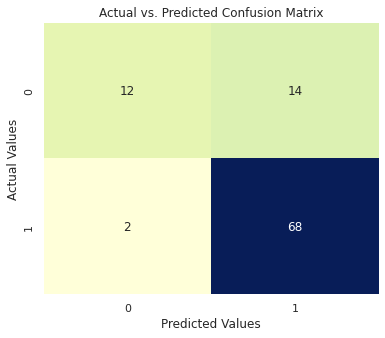

In [51]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.heatmap(Confusion_Matrix1, annot=True, fmt='d',cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [52]:
tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()
print("True Negative(TN) : ",tn)
print("False Positive(FP) : ",fp)
print("False Negative(FN) : ",fn)
print("True Positive(TP) : ",tp)

True Negative(TN) :  12
False Positive(FP) :  14
False Negative(FN) :  2
True Positive(TP) :  68


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        26
           1       0.83      0.97      0.89        70

    accuracy                           0.83        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.84      0.83      0.81        96



<font color="gray">**>Recall:It gives us an idea about when it's actual yes(1) ,how often does it predict yes**

Sensitivity or TPR or Hit rate=TP/(TP+FN) =0.97

Specificity or TNR =TN/(TN+FP) =0.46
 
 
 


**>Precision: It tells us about when it predicts yes , how often is it correct**

Positive Predictive Value(Precision) = TP/(TP+FP) =0.83

Negative Predictive Value = TN/(TN+FN)=0.86




**>Accuracy : the proportion of the total number of predictions that were correct**

Accuracy = (TN+TP)/(TN+FP+FN+TP)=0.83




**>Error rate  = incorrect predictions / total predictions**

Error rate = (FP+FN)/(TN+FP+FN+TP) = 1-Accuracy=0.17



**>False Alarm**

FP : Type 1 error

FN : Type 2 error




**Note:**

*High recall value, low precision value: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.*


*Low recall value, high precision value: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)*


False positive rate(FPR) =FP/(TN + FP)

FPR= 1- Specificity


### <font color='blue'> * ROC Curve for training dataset

<font color="purple">An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    * True Positive Rate (Sensitivity)
     
    * False Positive Rate ( 1- Speficity)

In [ ]:
y_predict_train=log_model.predict(x_train)


In [ ]:
y_prob_train=log_model.predict_proba(x_train)


<font color="purple">**The first column indicates the predicted probability of class 0, and the second column indicates the predicted probability of class 1**

<font color="purple"> **Let us consider the second column indicates the predicted probability of class 1**

In [ ]:
y_prob_train=log_model.predict_proba(x_train)[:,1]


In [57]:
#import necessary libraries for roc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_ROC_AUC1=roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

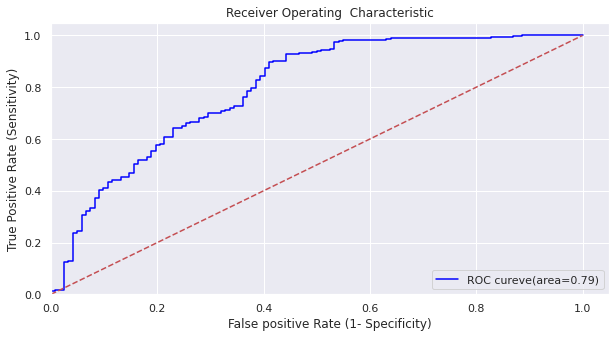

In [58]:
# For default thershold value = 0.5
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,color="Blue",label="ROC cureve(area=%0.2f)"%roc_auc1)
plt.plot([0,1],[0,1],"r--") #for this line auc = 0.50
plt.xlim([0.0,1.05])   
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate (1- Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating  Characteristic")
plt.legend(loc="lower right")
plt.show()

<font color="purple">**The area under the ROC curve (AUC) is 0.79,
Which is Good enough to say that model is good to use.**


<a href="https://miro.medium.com/max/606/1*F4go8Ak0ftbX5AvaaC9-WA.png">more information about AUC value</a>

<font color='blue'>**ROC Curve for test dataset**

In [59]:
y_predict_test=log_model.predict(x_test)
y_prob_test=log_model.predict_proba(x_test)[:,1] 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_ROC_AUC1=roc_auc_score(y_test,y_predict_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,y_prob_test)
roc_auc1=auc(fpr1,tpr1)

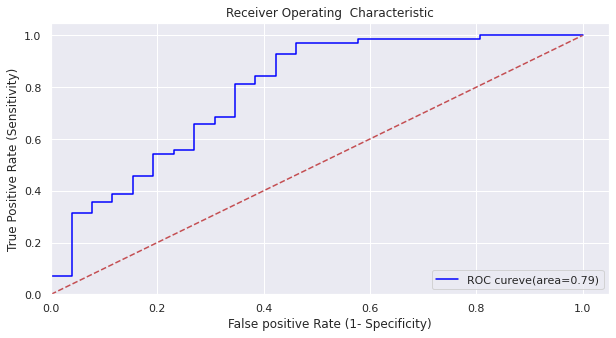

In [60]:
# For default thershold value = 0.5
plt.figure(figsize=(10,5))
plt.plot(fpr1,tpr1,color="Blue",label="ROC cureve(area=%0.2f)"%roc_auc1)
plt.plot([0,1],[0,1],"r--") #for this line auc = 0.50
plt.xlim([0.0,1.05])   
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate (1- Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating  Characteristic")
plt.legend(loc="lower right")
plt.show()

<font color="purple">**The area under the ROC curve (AUC) is 0.79,
Which is Good enough to say that model is good to use.**


<font color='blue'>**Accuracy check for different Threshold value**

In [61]:
y_prob_test=log_model.predict_proba(x_test)[:,1]
from sklearn.preprocessing import binarize
y_predict_class1=binarize(y_prob_test.reshape(1,-1),0.35)[0]  #Threshold value consider as 0.35
y_predict_class1

array([1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [62]:
#Converting the array from float datatype to integer  data type
y_predict_class1=y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix=confusion_matrix(y_test, y_predict_class1)  # This is confusion matrix for test data set
Confusion_Matrix

array([[11, 15],
       [ 2, 68]])

In [64]:
tn,fp,fn,tp=confusion_matrix(y_test, y_predict_class1).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

True Negative :  11
False Positive :  15
False Negative :  2
True Positive :  68


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

              precision    recall  f1-score   support

           0       0.85      0.42      0.56        26
           1       0.82      0.97      0.89        70

    accuracy                           0.82        96
   macro avg       0.83      0.70      0.73        96
weighted avg       0.83      0.82      0.80        96



<font color='blue'>**Calculating Optimal Threshold value**

In [66]:
from sklearn.metrics import roc_curve,auc

In [67]:
fpr,tpr,thresholds=roc_curve(y_train,y_prob_train)
roc_auc=auc(fpr,tpr)
#tpr
#fpr

In [68]:
len(tpr)

116

In [69]:
print("Area under the Roc curve :%f"%roc_auc) # for threshold value = 0.50

Area under the Roc curve :0.793549


In [ ]:
import numpy as np
i=np.arange(len(tpr))  
roc=pd.DataFrame({"fpr":pd.Series(fpr,index=i),"tpr":pd.Series(tpr,index=i),"1-fpr":pd.Series(1-fpr,index=i),
                  "tf":pd.Series(tpr-(1-fpr),index=i),"Thresholds":pd.Series(thresholds,index=i)})


In [71]:
roc.iloc[(roc.tf).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,Thresholds
60,0.295082,0.698473,0.704918,-0.006445,0.733039


Text(0.5, 1.0, 'Receiver Operating Characteristic')

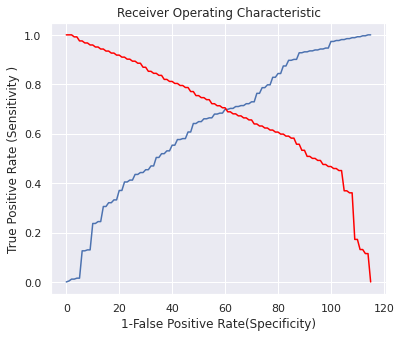

In [72]:
fig,ax=plt.subplots()
plt.plot(roc["tpr"])
plt.plot(roc["1-fpr"],color="red")
plt.xlabel("1-False Positive Rate(Specificity)")
plt.ylabel("True Positive Rate (Sensitivity )")
plt.title("Receiver Operating Characteristic")

<font color="purple">**From graph at the intercection ponit of sensitity and specificity, we get threshold value which shows for this threshold value we get nearly simillar Sensitivty and Specificity value.**

In [73]:
print(features)
len(features)

['Dependents_2', 'Gender_Male', 'LoanAmount', 'CoapplicantIncome', 'Credit_History', 'Married_Yes', 'Education_Not Graduate', 'Property_Area_Urban', 'Self_Employed_Yes', 'ApplicantIncome', 'Loan_Amount_Term', 'Dependents_1', 'Dependents_3+', 'Property_Area_Semiurban']


14

In [74]:
import statsmodels.api as sm
x=new_data[['Property_Area_Semiurban', 'Dependents_1', 'LoanAmount', 'Self_Employed_Yes', 'Married_Yes', 'CoapplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'Gender_Male', 'Dependents_2', 'Property_Area_Urban', 'Education_Not Graduate', 'Dependents_3+', 'ApplicantIncome']]
y=new_data["Loan_Status"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=6 ,test_size =0.20)
x1=sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457317
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.268     
Dependent Variable:   Loan_Status        AIC:                381.2193  
Date:                 2021-10-08 19:20   BIC:                440.4789  
No. Observations:     384                Log-Likelihood:     -175.61   
Df Model:             14                 LL-Null:            -240.05   
Df Residuals:         369                LLR p-value:        1.1305e-20
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   -2.8918   1.0736 -2.6935 0.0071 -4.9962

#### <font color="purple">Odds ratio value for Credit_History variable is 

=exp(coef. fo Credit_History)

=exp( 3.7863) = 44.09295

Thus we can conclude that the estimated odd of getting Loan status yes for customer who have credit history yes are 44 times greater than than the estimated odds of getting loan status yes for customer who do not have credit history( crdit_history=No)


### <font color='red'> 2)K-Nearest Neighbors classifier 

In [75]:
features=list(set(columns_list)-set(["Loan_Status"]))
#Storing the output values in y
y=new_data["Loan_Status"].values
#Storing the values from inpt features 
x=new_data[features].values

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=25 ,test_size =0.20)

Importing the library of KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
#Storing the  KNN classifier
KNN_classifier= KNeighborsClassifier(n_neighbors=5)   # By defalult n_neighbors=5

In [79]:
#Fitting the model
KNN_classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
#Predicting the test values with model
prediction=KNN_classifier.predict(x_test)

In [81]:
#Performing metric check
from sklearn.metrics import confusion_matrix
Confusion_Matrix2=confusion_matrix(y_test,prediction)  # This is confusion matrix for train data set


Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

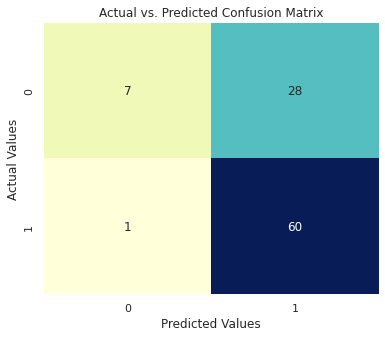

In [82]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.heatmap(Confusion_Matrix2, annot=True, fmt='d',cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [83]:
tn,fp,fn,tp=confusion_matrix(y_test, prediction).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

True Negative :  7
False Positive :  28
False Negative :  1
True Positive :  60


In [84]:
#Performing the accuracy
from sklearn.metrics import accuracy_score
KNN_accuracy_score=accuracy_score(y_test,prediction)
print(KNN_accuracy_score)

0.6979166666666666


In [85]:
print("Misclassified samples: %d" %(y_test != prediction).sum())

Misclassified samples: 29


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.20      0.33        35
           1       0.68      0.98      0.81        61

    accuracy                           0.70        96
   macro avg       0.78      0.59      0.57        96
weighted avg       0.75      0.70      0.63        96



<font color='blue'>**Effect of K values on classifier**

In [87]:
Misclassified_sample=[]
k_value=[]
#Calculating error for k values between 1 and 20
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    Misclassified_sample.append((y_test != pred_i).sum())
    k_value.append(i)

In [ ]:
D={"K":k_value,"Misclassified_sample":Misclassified_sample}
table=pd.DataFrame(D) 
table.set_index("K")

<font color="purple">Parameter value of K= 5 has less misclassified_samples.

### <font color='red'>3)Decision Tree classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# instantiate the classifier
dtclf = DecisionTreeClassifier(criterion='entropy')
#clf = DecisionTreeClassifier(random_state=0)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1000 ,test_size =0.25)

In [92]:
dtclf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
y_pred3 = dtclf.predict(x_test)
y_pred3

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [94]:
#Performing metric check
from sklearn.metrics import confusion_matrix
Confusion_Matrix3=confusion_matrix(y_test,y_pred3)  # This is confusion matrix for test data set


Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

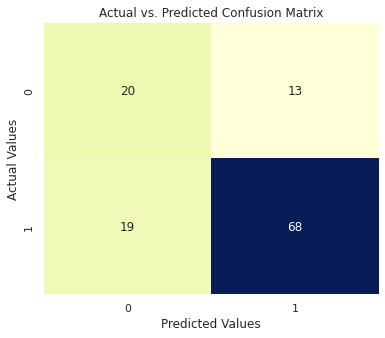

In [95]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.heatmap(Confusion_Matrix3, annot=True, fmt='d',cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [96]:
tn,fp,fn,tp=confusion_matrix(y_test, y_pred3).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

True Negative :  20
False Positive :  13
False Negative :  19
True Positive :  68


In [97]:
print("Misclassified samples: %d" %(y_test != y_pred3).sum())

Misclassified samples: 32


In [98]:
#Performing the accuracy
from sklearn.metrics import accuracy_score
DT_accuracy_score=accuracy_score(y_test,y_pred3)
print(DT_accuracy_score)

0.7333333333333333


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.51      0.61      0.56        33
           1       0.84      0.78      0.81        87

    accuracy                           0.73       120
   macro avg       0.68      0.69      0.68       120
weighted avg       0.75      0.73      0.74       120



### <font color='red'>4)Random Forest Classifier

In [100]:
#Storing the columns names
columns_list=list(new_data.columns)
print(columns_list)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']


In [101]:
#Seperating the input columns from data
features=list(set(columns_list)-set(["Loan_Status"]))
print(features)

['Dependents_2', 'Gender_Male', 'LoanAmount', 'CoapplicantIncome', 'Credit_History', 'Married_Yes', 'Education_Not Graduate', 'Property_Area_Urban', 'Self_Employed_Yes', 'ApplicantIncome', 'Loan_Amount_Term', 'Dependents_1', 'Dependents_3+', 'Property_Area_Semiurban']


In [102]:
#Storing the output values in y
y=new_data["Loan_Status"].values
print(y)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [103]:
#Storing the values from input features 
x=new_data[features].values
print(x)

[[  0.   1. 128. ...   1.   0.   0.]
 [  0.   1.  66. ...   0.   0.   0.]
 [  0.   1. 120. ...   0.   0.   0.]
 ...
 [  0.   1. 253. ...   1.   0.   0.]
 [  1.   1. 187. ...   0.   0.   0.]
 [  0.   0. 133. ...   0.   0.   1.]]


In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=6 ,test_size =0.20)

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
# instantiate the RF classifier
# Set the random state for reproducibility
RFclf = RandomForestClassifier(random_state=42)

In [107]:
# train the algorithm utilizing the training and target class
RFclf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [108]:
# predict the test set
y_pred4 = RFclf.predict(x_test)

In [109]:
# Confusion Matrix
confusion_matrix4 = confusion_matrix(y_test, y_pred4)
print(confusion_matrix4)

[[15 11]
 [ 8 62]]


Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

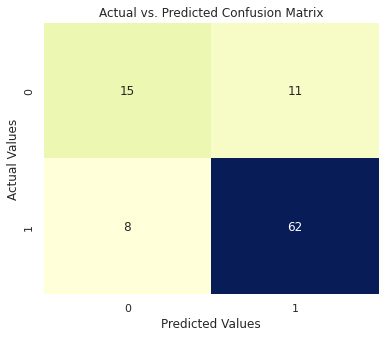

In [110]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.heatmap(confusion_matrix4, annot=True, fmt='d',cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [111]:
tn,fp,fn,tp=confusion_matrix(y_test, y_pred4).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

True Negative :  15
False Positive :  11
False Negative :  8
True Positive :  62


In [112]:
print("Misclassified samples: %d" %(y_test != y_pred4).sum())

Misclassified samples: 19


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        26
           1       0.85      0.89      0.87        70

    accuracy                           0.80        96
   macro avg       0.75      0.73      0.74        96
weighted avg       0.80      0.80      0.80        96



In [114]:
RF_accuracy_score=accuracy_score(y_test,y_pred4)
print(RF_accuracy_score)

0.8020833333333334


 ## <font color='purple'>Classifiers and Accuracy table

In [115]:
data = [ ['Random Forest ',RF_accuracy_score*100],
         ['LogisticRegression ',logistic_accuracy*100],
         ['Decision Tree ',DT_accuracy_score*100],
         ['K-Nearest Neighbors ',KNN_accuracy_score*100]
         ]
df = pd.DataFrame(data,columns = ['Classifier','Accuracy'] )
df

,Classifier,Accuracy
0,Random Forest,80.208333
1,LogisticRegression,83.333333
2,Decision Tree,73.333333
3,K-Nearest Neighbors,69.791667


 Logistic Regression is the one which performed the best with test accuracy of 83.33%.

## **Saving The Model**

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=6 ,test_size =0.20)

In [119]:
from sklearn.linear_model import LogisticRegression
# Instantiate the classifier
log_model = LogisticRegression()
# Train classifier
log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(x_test)
logistic_accuracy=accuracy_score(y_test,y_pred)
print(logistic_accuracy)

0.8333333333333334


In [121]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(log_model)
 
# Load the pickled model
dtc_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
dtc_from_pickle.predict(x_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])